### Importing table and setting row id's

In [1]:
import pandas as pd
from datetime import datetime

df = pd.read_csv("store_data_clean.csv", index_col = 0, parse_dates = True)
df

C:\Users\dyan0\AppData\Local\Temp\ipykernel_20560\991463204.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("store_data_clean.csv", index_col = 0, parse_dates = True)


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs ...,731.9400,3.0,0.00,219.5820
3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3.0,0.20,4.1028
9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2.0,0.00,15.6332
9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2.0,0.20,19.3932


### Correcting dates for Order Date and Ship Date columns:

In [2]:
print("Earliest order date (Incorrect): ", df['Order Date'].min())
print("Latest order date (Incorrect): ", df['Order Date'].max())

Earliest order date (Incorrect):  1/1/2017
Latest order date (Incorrect):  9/9/2017


In [3]:
print('Datetime object absent for "Order Date" col:\n', df['Order Date'].dtype, "\n")
df['Order Date'] = pd.to_datetime(df['Order Date'])
print('Verfiying datetime:\n', df['Order Date'].dtype)

Datetime object absent for "Order Date" col:
 object 

Verfiying datetime:
 datetime64[ns]


In [4]:
print("Earliest Order Date (Corrected): ", df['Order Date'].min())
print("Latest Order Date (Corrected): ", df['Order Date'].max())
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
print("Earliest Ship Date: ", df['Ship Date'].min())
print("Latest Ship Date: ", df['Ship Date'].max())

Earliest Order Date (Corrected):  2014-01-03 00:00:00
Latest Order Date (Corrected):  2017-12-30 00:00:00
Earliest Ship Date:  2014-01-07 00:00:00
Latest Ship Date:  2018-01-05 00:00:00


### Finding unique values in each column of interest

In [5]:
print(df['Ship Mode'].value_counts(), '\n')
print(df['Customer Name'].value_counts(), '\n')
print(df['Segment'].value_counts(), '\n')
print(df['Country'].value_counts(), '\n')
print(df['City'].value_counts(), '\n')
print(df['State'].value_counts(), '\n')
print(df['Category'].value_counts(), '\n')
print(df['Sub-Category'].value_counts(), '\n')
print(df['Product Name'].value_counts(), '\n')


Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64 

Customer Name
William Brown          37
John Lee               34
Matt Abelman           34
Paul Prost             34
Chloris Kastensmidt    32
                       ..
Lela Donovan            1
Anthony O'Donnell       1
Carl Jackson            1
Ricardo Emerson         1
Jocasta Rupert          1
Name: count, Length: 793, dtype: int64 

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64 

Country
United States    9994
Name: count, dtype: int64 

City
New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: count, Length: 531, dtype: int64 

State
California              2001
New York                1128
Texas       

### Deciding to focus on different shipping times based on Ship Mode, Segment, Sub-Category, and Profit

First creating new column in dataframe with shipping time

In [6]:
df['Time to Ship'] = (df['Ship Date'] - df['Order Date'])
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Time to Ship
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136,3 days
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs ...,731.9400,3.0,0.00,219.5820,3 days
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714,4 days
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310,7 days
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164,7 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,...,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3.0,0.20,4.1028,2 days
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2.0,0.00,15.6332,5 days
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2.0,0.20,19.3932,5 days


Looking into different combinations of factors and seeing if there are any outliers

First sorting by Segment:

In [7]:
dfCons = df[ df['Segment'] == 'Consumer' ]
dfCorp = df[ df['Segment'] == 'Corporate' ]
dfHOff = df[ df['Segment'] == 'Home Office' ]

Next observing distribution of Ship Methods in each Segment:

In [8]:
print('Consumer', dfCons['Ship Mode'].value_counts(), '\n')
print('Consumer Ship Mode %\nStandard Class   ', (dfCons[ dfCons['Ship Mode'] == 'Standard Class' ].size / dfCons.size) * 100, '%\nSecond Class     ', (dfCons[ dfCons['Ship Mode'] == 'Second Class' ].size / dfCons.size) * 100, '%\nFirst Class      ',  (dfCons[ dfCons['Ship Mode'] == 'First Class' ].size / dfCons.size) * 100, '%\nSame Day          ',  (dfCons[ dfCons['Ship Mode'] == 'Same Day' ].size / dfCons.size) * 100, '%\n')
print('Corporate', dfCorp['Ship Mode'].value_counts(), '\n')
print('Corporate Ship Mode %\nStandard Class   ', (dfCorp[ dfCorp['Ship Mode'] == 'Standard Class' ].size / dfCorp.size) * 100, '%\nSecond Class     ', (dfCorp[ dfCorp['Ship Mode'] == 'Second Class' ].size / dfCorp.size) * 100, '%\nFirst Class      ',  (dfCorp[ dfCorp['Ship Mode'] == 'First Class' ].size / dfCorp.size) * 100, '%\nSame Day          ',  (dfCorp[ dfCorp['Ship Mode'] == 'Same Day' ].size / dfCorp.size) * 100, '%\n')
print('Home Office', dfHOff['Ship Mode'].value_counts(), '\n')
print('Home Office Ship Mode %\nStandard Class   ', (dfHOff[ dfHOff['Ship Mode'] == 'Standard Class' ].size / dfHOff.size) * 100, '%\nSecond Class     ', (dfHOff[ dfHOff['Ship Mode'] == 'Second Class' ].size / dfHOff.size) * 100, '%\nFirst Class      ',  (dfHOff[ dfHOff['Ship Mode'] == 'First Class' ].size / dfHOff.size) * 100, '%\nSame Day          ',  (dfHOff[ dfHOff['Ship Mode'] == 'Same Day' ].size / dfHOff.size) * 100, '%\n')

Consumer Ship Mode
Standard Class    3085
Second Class      1020
First Class        769
Same Day           317
Name: count, dtype: int64 

Consumer Ship Mode %
Standard Class    59.42978231554614 %
Second Class      19.64939318050472 %
First Class       14.814101329223655 %
Same Day           6.106723174725486 %

Corporate Ship Mode
Standard Class    1812
Second Class       609
First Class        485
Same Day           114
Name: count, dtype: int64 

Corporate Ship Mode %
Standard Class    60.0 %
Second Class      20.165562913907284 %
First Class       16.05960264900662 %
Same Day           3.774834437086093 %

Home Office Ship Mode
Standard Class    1071
Second Class       316
First Class        284
Same Day           112
Name: count, dtype: int64 

Home Office Ship Mode %
Standard Class    60.06730229949523 %
Second Class      17.722938867077957 %
First Class       15.928210880538419 %
Same Day           6.28154795288839 %



The distribution of Ship Modes between each segment is nearly identical with Standard Class Shipping accounting for around 60%, Second Class for roughly 20%, First Class for 15%, and Same Day for 5%.

Next we do the same comparison between Segments and Sub-Categories:

In [9]:
print('Consumer', dfCons['Sub-Category'].value_counts(), '\n')
print('Corporate', dfCorp['Sub-Category'].value_counts(), '\n')
print('Consumer', dfHOff['Sub-Category'].value_counts(), '\n')

Consumer Sub-Category
Binders        780
Paper          693
Furnishings    494
Phones         451
Storage        450
Art            428
Accessories    408
Chairs         329
Appliances     244
Labels         189
Tables         159
Bookcases      131
Envelopes      129
Fasteners      114
Supplies       100
Machines        57
Copiers         35
Name: count, dtype: int64 

Corporate Sub-Category
Binders        473
Paper          408
Furnishings    288
Phones         272
Storage        260
Accessories    227
Art            218
Chairs         188
Appliances     155
Tables         106
Labels         102
Envelopes       84
Bookcases       64
Supplies        61
Fasteners       59
Machines        35
Copiers         20
Name: count, dtype: int64 

Consumer Sub-Category
Binders        270
Paper          269
Furnishings    175
Phones         166
Art            150
Accessories    140
Storage        136
Chairs         100
Labels          73
Appliances      67
Tables          54
Fasteners       44
Env

Again the distribution of Sub-Categories for each Segment is nearly identical to each other, meaning that we will ignore the Segment in future data analyses.

Next we observe differences for Time to Ship for each Ship Mode:

In [10]:
dfStandard = df[ df['Ship Mode'] == 'Standard Class' ]
dfSecond = df[ df['Ship Mode'] == 'Second Class' ]
dfFirst = df[ df['Ship Mode'] == 'First Class' ]
dfSame = df[ df['Ship Mode'] == 'Same Day' ]

In [11]:
print('Standard', dfStandard['Time to Ship'].value_counts(), '\nAverage: ', dfStandard['Time to Ship'].mean(), '\nMedian: ', dfStandard['Time to Ship'].median(), '\n')
print('Second', dfSecond['Time to Ship'].value_counts(), '\nAverage: ', dfSecond['Time to Ship'].mean(), '\nMedian: ', dfSecond['Time to Ship'].median(), '\n')
print('First', dfFirst['Time to Ship'].value_counts(), '\nAverage: ', dfFirst['Time to Ship'].mean(), '\nMedian: ', dfFirst['Time to Ship'].median(), '\n')
print('Same Day', dfSame['Time to Ship'].value_counts(), '\nAverage: ', dfSame['Time to Ship'].mean(), '\nMedian: ', dfSame['Time to Ship'].median(), '\n')

Standard Time to Ship
4 days    2402
5 days    1740
6 days    1203
7 days     621
3 days       2
Name: count, dtype: int64 
Average:  5 days 00:09:24.611260053 
Median:  5 days 00:00:00 

Second Time to Ship
2 days    764
5 days    429
3 days    380
4 days    371
1 days      1
Name: count, dtype: int64 
Average:  3 days 05:42:47.197943444 
Median:  3 days 00:00:00 

First Time to Ship
3 days    623
2 days    570
1 days    344
4 days      1
Name: count, dtype: int64 
Average:  2 days 04:23:05.695708712 
Median:  2 days 00:00:00 

Same Day Time to Ship
0 days    519
1 days     24
Name: count, dtype: int64 
Average:  0 days 01:03:38.784530386 
Median:  0 days 00:00:00 



We can observe that the Time to Ship lines up with expectations for all metrics except for the most common Time to Ship between Second Class and First Class shipping. First Class shipping's most common shipping time is 3 days compared to Second Class's 2 days. This requires further data analysis.

We will now observe these differences on a chart.

In [12]:
df['Days to Ship'] = df['Time to Ship'].dt.days
dfStandard = df[ df['Ship Mode'] == 'Standard Class' ]
dfSecond = df[ df['Ship Mode'] == 'Second Class' ]
dfFirst = df[ df['Ship Mode'] == 'First Class' ]
dfSame = df[ df['Ship Mode'] == 'Same Day' ]
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Time to Ship,Days to Ship
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136,3 days,3
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-CH-10000454,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs ...,731.9400,3.0,0.00,219.5820,3 days,3
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714,4 days,4
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310,7 days,7
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164,7 days,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,...,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3.0,0.20,4.1028,2 days,2
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2.0,0.00,15.6332,5 days,5
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2.0,0.20,19.3932,5 days,5


<Axes: title={'center': 'Shipping Times Based on Class'}, xlabel='Days to Ship', ylabel='Frequency'>

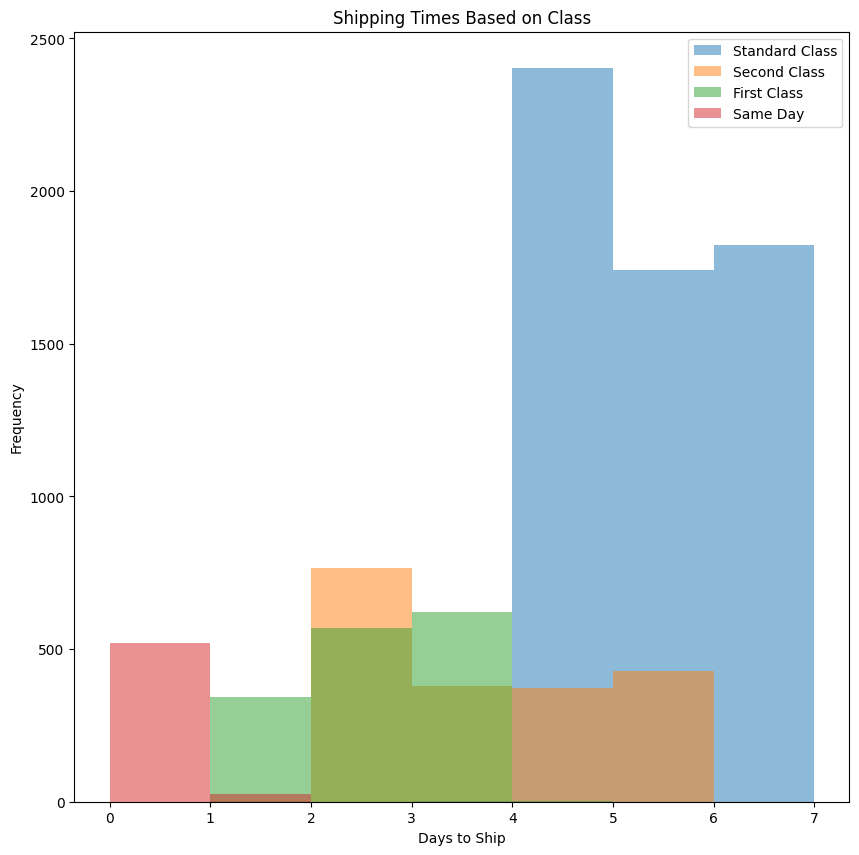

In [13]:
df2 = pd.DataFrame(
    {'Standard Class' : dfStandard['Days to Ship'],
     'Second Class' : dfSecond['Days to Ship'],
     'First Class' : dfFirst['Days to Ship'],
     'Same Day' : dfSame['Days to Ship']}
)
df2.plot.hist(bins=7, alpha=0.5, title='Shipping Times Based on Class', xlabel='Days to Ship', figsize=(10, 10))

Here we can see the HONEST graph clearly outlines the differences between the shipping classes and how they result in faster shipping with the higher classes.

Taking a look at each Ship Mode's Sub-Categories, it is again nearly an identical distribution between each of them with Binders and Paper sales being the bulk.

In [14]:
print('Standard Class Sub-Categories', dfStandard['Sub-Category'].value_counts(), '\n')
print('Second Class Sub-Categories', dfSecond['Sub-Category'].value_counts(), '\n')
print('First Class Sub-Categories', dfFirst['Sub-Category'].value_counts(), '\n')
print('Same Day Sub-Categories', dfSame['Sub-Category'].value_counts(), '\n')


Standard Class Sub-Categories Sub-Category
Binders        947
Paper          783
Furnishings    575
Phones         534
Storage        504
Art            493
Accessories    444
Chairs         359
Appliances     288
Labels         221
Tables         190
Envelopes      155
Fasteners      136
Bookcases      124
Supplies       111
Machines        68
Copiers         36
Name: count, dtype: int64 

Second Class Sub-Categories Sub-Category
Paper          289
Binders        263
Furnishings    184
Phones         175
Storage        171
Accessories    162
Art            155
Chairs         134
Appliances      79
Labels          62
Tables          61
Envelopes       53
Bookcases       48
Supplies        43
Fasteners       37
Copiers         15
Machines        14
Name: count, dtype: int64 

First Class Sub-Categories Sub-Category
Binders        239
Paper          217
Furnishings    146
Phones         138
Accessories    128
Storage        119
Art            112
Chairs          85
Appliances      76
Lab

If we take a look at Profit though, we see that there are diffrences between them with the Standard Class being the least profitable and the higher classes being more profitable.

In [15]:
print('Standard Class Sub-Categories', dfStandard['Profit'].mean(), '\n')
print('Second Class Sub-Categories', dfSecond['Profit'].mean(), '\n')
print('First Class Sub-Categories', dfFirst['Profit'].mean(), '\n')
print('Same Day Sub-Categories', dfSame['Profit'].mean(), '\n')


Standard Class Sub-Categories 27.890641090449538 

Second Class Sub-Categories 29.61574511319713 

First Class Sub-Categories 33.53578838664813 

Same Day Sub-Categories 30.973650401606424 



If we wanted to LIE POSITIVELY, we could remove the Standard Class data from our dataset. We could argue that because the Standard Class is the least profitable, it would impact our margins the least and, therefore, we could decrease our Time to Ship in the chart.

<Axes: title={'center': 'Shipping Times Based on Class'}, xlabel='Days to Ship', ylabel='Frequency'>

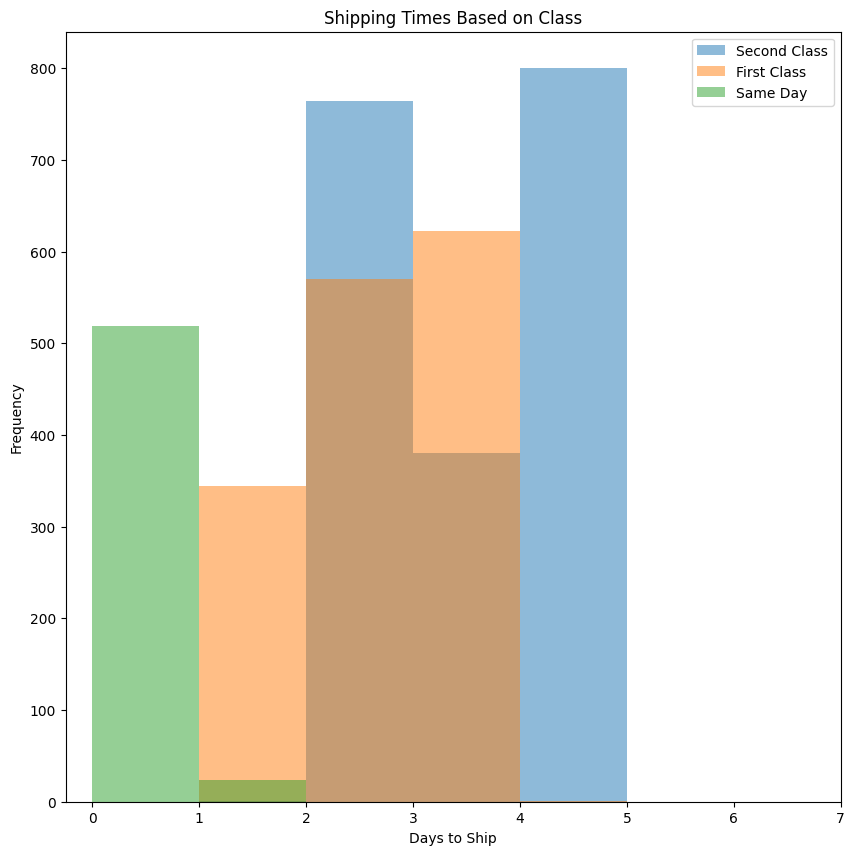

In [16]:
df3 = pd.DataFrame(
    {'Second Class' : dfSecond['Days to Ship'],
     'First Class' : dfFirst['Days to Ship'],
     'Same Day' : dfSame['Days to Ship']}
)
df3.plot.hist(bins=5, alpha=0.5, title='Shipping Times Based on Class', xticks=[0, 1, 2, 3, 4, 5, 6, 7], xlabel='Days to Ship', figsize=(10, 10))

If we wanted to LIE NEGATIVELY, we could do the opposite and simply remove the Same Day, First Class, and Second Class categories from our dataset. We could argue that their combined sales do no reach that of the Standard Class and their marginally increased profit margins do not compensate for this, therefore increasing our Time to Ship on the chart.

<Axes: title={'center': 'Shipping Times Based on Class'}, xlabel='Days to Ship', ylabel='Frequency'>

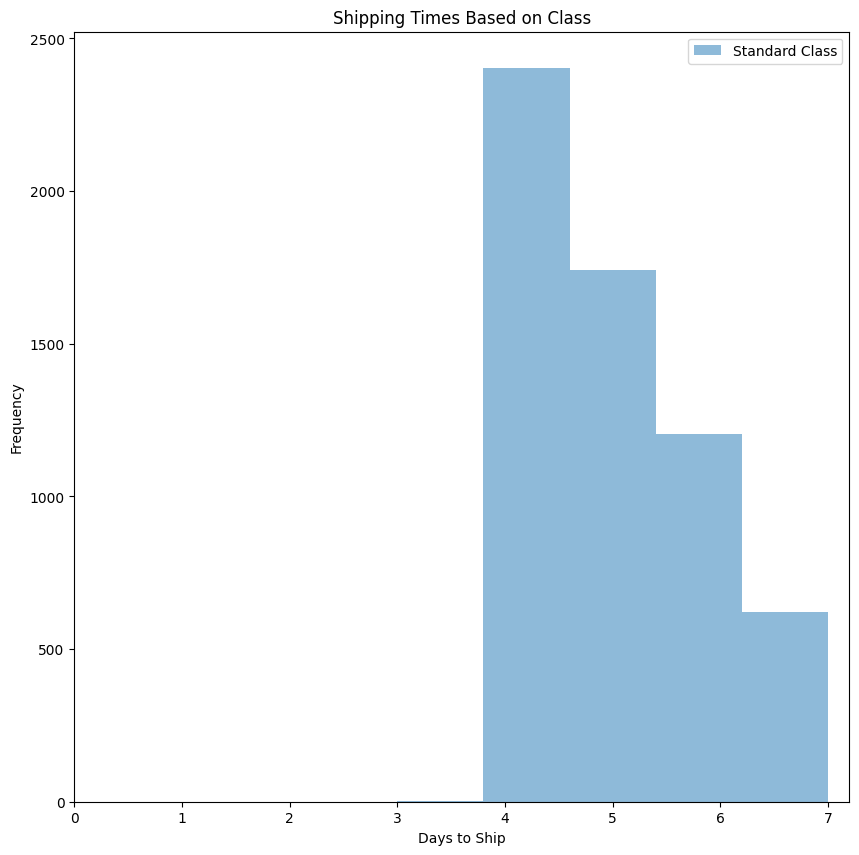

In [17]:
df4 = pd.DataFrame(
    {'Standard Class' : dfStandard['Days to Ship']}
)
df4.plot.hist(bins=5, alpha=0.5, title='Shipping Times Based on Class', xticks=[0, 1, 2, 3, 4, 5, 6, 7], xlabel='Days to Ship', figsize=(10, 10))

In [ ]:
# df['Ship Speed'] = 

   Sub-Category  Quantity      Profit
0   Accessories    2976.0  41936.6357
1    Appliances    1606.0  15849.7261
2           Art    2831.0   6279.0104
3       Binders    5194.0  29093.2514
4     Bookcases     799.0  -3156.8980
5        Chairs    2303.0  26393.4509
6       Copiers     234.0  55617.8249
7     Envelopes     880.0   6460.8691
8     Fasteners     901.0    942.4378
9   Furnishings    3139.0  10597.4281
10       Labels    1287.0   3439.2812
11     Machines     419.0     43.5860
12        Paper    4633.0  31407.5631
13       Phones    3254.0  44447.8791
14      Storage    3018.0  20938.8943
15     Supplies     611.0  -1292.5155
16       Tables    1137.0 -17228.7076


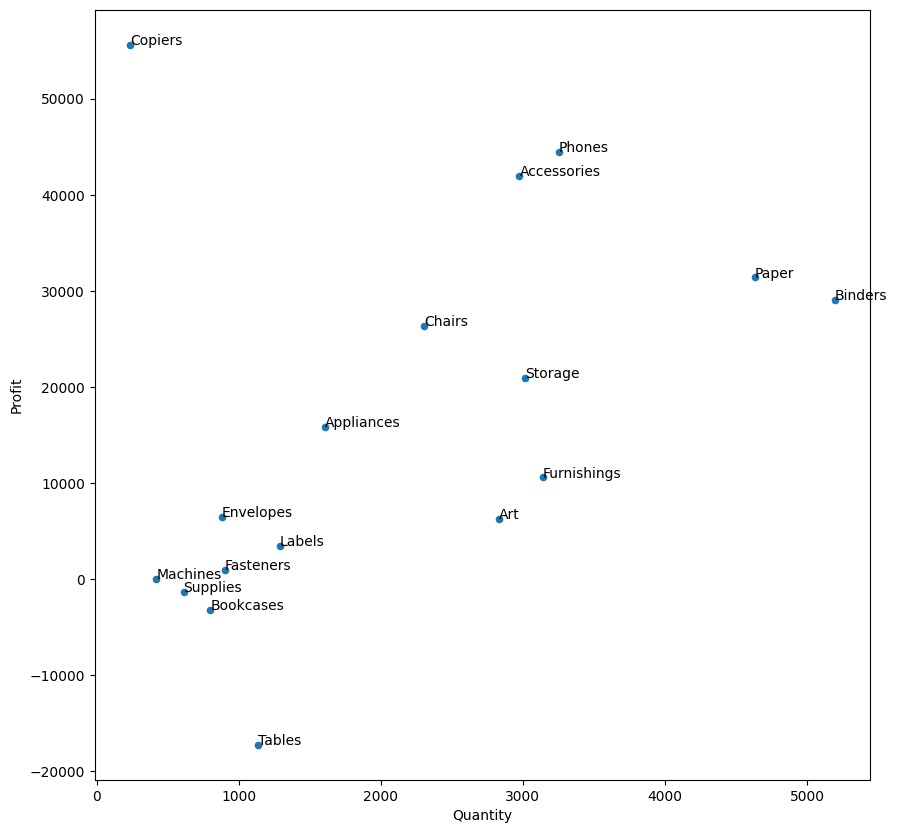

In [24]:
df5 = pd.DataFrame(
    {'Sub-Category' : df['Sub-Category'],
     'Quantity' : df['Quantity'],
    #  'Shipping Speed' : df['Ship Mode'],
     'Profit' : df['Profit']}
)
df5 = df5.groupby('Sub-Category').sum().reset_index()
print(df5)
ax = df5.plot(kind='scatter', x='Quantity', y='Profit', figsize=(10, 10))
for idx, row in df5.iterrows():
    ax.annotate(row['Sub-Category'], (row['Quantity'], row['Profit']))

Sources:

Pandas "read_csv" error solution for original "store_data.csv" file:

https://iqcode.com/code/python/unicodedecodeerror-utf-8-codec-cant-decode-byte-invalid-start-byte

Pandas "to_datetime" documentation:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

Pandas "value_counts" documentation:

https://note.nkmk.me/en/python-pandas-value-counts/

Pandas "dt.days" fix:

https://stackoverflow.com/questions/25646200/python-convert-timedelta-to-int-in-a-dataframe

Pandas "plot.histogram" documentation:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html#pandas.DataFrame.plot.hist

Pandas cheat sheet from STAT 107:

https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

Pandas scatterplot annotating points:

https://www.statology.org/pandas-scatter-plot-label-points/